In [1]:
# Jalankan kode ini untuk upload file CSV secara manual di Colab
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


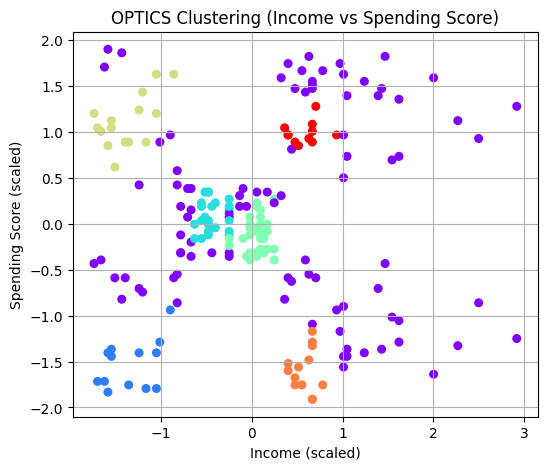

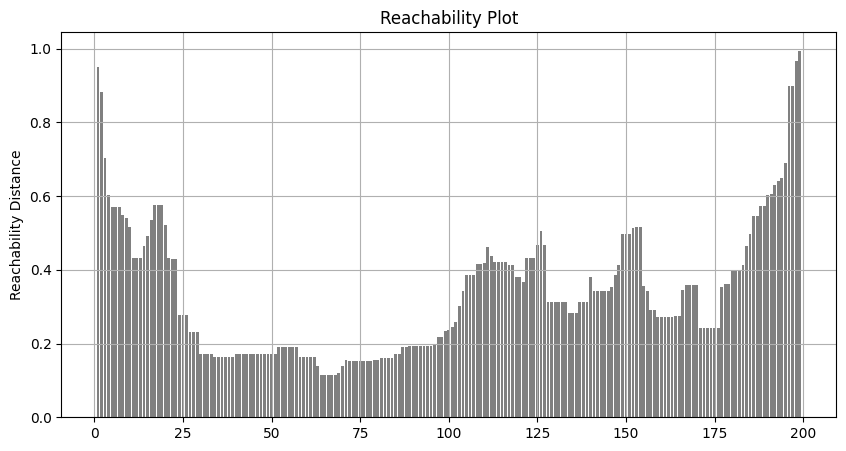

Silhouette Score: 0.040
Jumlah outlier: 94


In [2]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Baca file CSV (nama file harus sesuai dengan yang diupload)
df = pd.read_csv('Mall_Customers.csv')

# 3. Ambil fitur yang digunakan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 4. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Terapkan OPTICS
clust = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
clust.fit(X_scaled)
labels = clust.labels_

# 6. Visualisasi hasil clustering
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='rainbow', s=30)
plt.title("OPTICS Clustering (Income vs Spending Score)")
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

# 7. Reachability Plot
space = np.arange(len(X_scaled))
reach = clust.reachability_[clust.ordering_]
plt.figure(figsize=(10,5))
plt.bar(space, reach, color='gray')
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot')
plt.grid(True)
plt.show()

# 8. Evaluasi (Silhouette Score)
if len(set(labels) - {-1}) > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Tidak cukup cluster valid untuk menghitung Silhouette.")

# 9. Statistik Outlier
outliers = np.sum(labels == -1)
print(f"Jumlah outlier: {outliers}")
